In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from sklearn.model_selection import train_test_split

# Set a random seed to ensure reproducibility across runs
RNG_SEED = 42
np.random.seed(seed=RNG_SEED)

In [33]:
PATH = os.getcwd()
train_path = os.path.join(PATH, 'zt_train.csv')

test_path = os.path.join(PATH, 'zt_test.csv')

df_train = pd.read_csv(train_path)

df_test = pd.read_csv(test_path)

print(f'df_train DataFrame shape: {df_train.shape}')

print(f'df_test DataFrame shape: {df_test.shape}')
df_train.head

df_train DataFrame shape: (204, 6)
df_test DataFrame shape: (25, 6)


<bound method NDFrame.head of                   formula  Temperature    zt       k        c        s
0             Bi1Cu1Se1O1          701  0.92  0.7223  446.126  146.245
1    Bi0.98Sn0.02Cu1Se1O1          701  0.71  0.8563  407.910  145.164
2    Bi0.96Sn0.04Cu1Se1O1          701  0.67  1.0033  426.163  150.029
3    Bi0.94Sn0.06Cu1Se1O1          701  0.66  0.8823  275.277  171.110
4    Bi0.92Sn0.08Cu1Se1O1          701  0.64  0.8887  333.028  157.056
..                    ...          ...   ...     ...      ...      ...
199  Bi0.94Yb0.06Cu1Se1O1          700  0.32  0.4415   26.319  275.578
200  Bi0.92Yb0.08Cu1Se1O1          700  0.20  0.4232   10.168  350.129
201  Bi0.90Yb0.10Cu1Se1O1          700  0.19  0.4070    9.856  335.733
202  Bi0.85Yb0.15Cu1Se1O1          700  0.27  0.4486   56.124  173.265
203    Bi0.7Yb0.3Cu1Se1O1          700  0.30  0.4408   60.805  176.350

[204 rows x 6 columns]>

In [11]:
#Import the package and the generate_features function
from cbfv.composition import generate_features

In [12]:
print('DataFrame column names before renaming:')
print(df_train.columns)

print(df_test.columns)

rename_dict = {'c': 'target'}
df_train = df_train.rename(columns=rename_dict)

df_test = df_test.rename(columns=rename_dict)

df_train = df_train.rename(columns=rename_dict)

df_test = df_test.rename(columns=rename_dict)

print('\nDataFrame column names after renaming:')
print(df_train.columns)

print(df_test.columns)
df_train.head

DataFrame column names before renaming:
Index(['formula', 'Temperature', 'zt', 'k', 'c', 's'], dtype='object')
Index(['formula', 'Temperature', 'zt', 'k', 'c', 's'], dtype='object')

DataFrame column names after renaming:
Index(['formula', 'Temperature', 'zt', 'k', 'target', 's'], dtype='object')
Index(['formula', 'Temperature', 'zt', 'k', 'target', 's'], dtype='object')


<bound method NDFrame.head of                   formula  Temperature    zt       k   target        s
0             Bi1Cu1Se1O1          701  0.92  0.7223  446.126  146.245
1    Bi0.98Sn0.02Cu1Se1O1          701  0.71  0.8563  407.910  145.164
2    Bi0.96Sn0.04Cu1Se1O1          701  0.67  1.0033  426.163  150.029
3    Bi0.94Sn0.06Cu1Se1O1          701  0.66  0.8823  275.277  171.110
4    Bi0.92Sn0.08Cu1Se1O1          701  0.64  0.8887  333.028  157.056
..                    ...          ...   ...     ...      ...      ...
199  Bi0.94Yb0.06Cu1Se1O1          700  0.32  0.4415   26.319  275.578
200  Bi0.92Yb0.08Cu1Se1O1          700  0.20  0.4232   10.168  350.129
201  Bi0.90Yb0.10Cu1Se1O1          700  0.19  0.4070    9.856  335.733
202  Bi0.85Yb0.15Cu1Se1O1          700  0.27  0.4486   56.124  173.265
203    Bi0.7Yb0.3Cu1Se1O1          700  0.30  0.4408   60.805  176.350

[204 rows x 6 columns]>

In [13]:
X_train_unscaled, y_train, formulae_train, skipped_train = generate_features(df_train, elem_prop='Magpie', drop_duplicates=False, extend_features=False, sum_feat=True)

X_test_unscaled, y_test, formulae_test, skipped_test = generate_features(df_test, elem_prop='Magpie', drop_duplicates=False, extend_features=False, sum_feat=True)

Assigning Features...: 100%|██████████| 25/25 [00:00<00:00, 8199.69it/s]

	Featurizing Compositions...
	Creating Pandas Objects...
	Featurizing Compositions...
	Creating Pandas Objects...


In [14]:
X_train_unscaled.head()

,sum_Number,sum_MendeleevNumber,sum_AtomicWeight,sum_MeltingT,sum_Column,sum_Row,sum_CovalentRadius,sum_Electronegativity,sum_NsValence,sum_NpValence,...,range_NValence,range_NsUnfilled,range_NpUnfilled,range_NdUnfilled,range_NfUnfilled,range_NUnfilled,range_GSvolume_pa,range_GSbandgap,range_GSmagmom,range_SpaceGroupNumber
0,154.00,326.00,367.485800,2450.9700,58.00,16.00,466.00,9.9100,7.0,11.00,...,73.25,0.1875,1.1875,0.0,0.0,0.50,100.241705,0.119700,0.0,8454.1875
1,153.34,325.88,365.680392,2450.1836,57.98,15.98,465.82,9.9088,7.0,10.98,...,58.96,0.1600,1.7600,0.0,0.0,1.04,109.456054,0.102144,0.0,7669.3600
2,152.68,325.76,363.874984,2449.3972,57.96,15.96,465.64,9.9076,7.0,10.96,...,58.96,0.1600,1.7600,0.0,0.0,1.04,109.456054,0.102144,0.0,7669.3600
3,152.02,325.64,362.069576,2448.6108,57.94,15.94,465.46,9.9064,7.0,10.94,...,58.96,0.1600,1.7600,0.0,0.0,1.04,109.456054,0.102144,0.0,7669.3600
4,151.36,325.52,360.264168,2447.8244,57.92,15.92,465.28,9.9052,7.0,10.92,...,58.96,0.1600,1.7600,0.0,0.0,1.04,109.456054,0.102144,0.0,7669.3600


In [15]:

descriptors = os.path.join(PATH, 'descriptors.csv')
X_train_unscaled.to_csv(descriptors, index=False)

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [17]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_unscaled)

X_test = scaler.transform(X_test_unscaled)

In [18]:
X_train = normalize(X_train)
X_test = normalize(X_test)

In [19]:
from time import time

from sklearn.dummy import DummyRegressor

from sklearn.linear_model import Ridge

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR
from sklearn.svm import LinearSVR

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [20]:
print(df_train.columns)
print(df_test.columns)

Index(['formula', 'Temperature', 'zt', 'k', 'target', 's'], dtype='object')
Index(['formula', 'Temperature', 'zt', 'k', 'target', 's'], dtype='object')


In [21]:
def instantiate_model(model_name):
    model = model_name()
    return model

def fit_model(model, X_train, y_train):
    ti = time()
    model = instantiate_model(model)
    model.fit(X_train, y_train)
    fit_time = time() - ti
    return model, fit_time

def evaluate_model(model, X, y_act):
    y_pred = model.predict(X)
    r2 = r2_score(y_act, y_pred)
    mae = mean_absolute_error(y_act, y_pred)
    rmse_val = mean_squared_error(y_act, y_pred, squared=False)
    return r2, mae, rmse_val

def fit_evaluate_model(model, model_name, X_train, y_train):
    model, fit_time = fit_model(model, X_train, y_train)
    r2_train, mae_train, rmse_train = evaluate_model(model, X_train, y_train)
    result_dict = {
        'model_name': model_name,
        'model_name_pretty': type(model).__name__,
        'model_params': model.get_params(),
        'fit_time': fit_time,
        'r2_train': r2_train,
        'mae_train': mae_train,
        'rmse_train': rmse_train,
       }
    return model, result_dict

def append_result_df(df, result_dict):
    df_result_appended = df.append(result_dict, ignore_index=True)
    return df_result_appended

def append_model_dict(dic, model_name, model):
    dic[model_name] = model
    return dic

In [22]:

df_classics = pd.DataFrame(columns=['model_name',
                                    'model_name_pretty',
                                    'model_params',
                                    'fit_time',
                                    'r2_train',
                                    'mae_train',
                                    'rmse_train',
                                    ])
df_classics

,model_name,model_name_pretty,model_params,fit_time,r2_train,mae_train,rmse_train


In [23]:
# Build a dictionary of model names
from collections import OrderedDict
classic_model_names = OrderedDict({
    'dumr': DummyRegressor,
    'rr': Ridge,
    'abr': AdaBoostRegressor,
    'gbr': GradientBoostingRegressor,
    'rfr': RandomForestRegressor,
    'etr': ExtraTreesRegressor,

    'knr': KNeighborsRegressor,
})


In [24]:
# Instantiate a dictionary to store the model objects
classic_models = OrderedDict()

# Keep track of elapsed time
ti = time()

# Loop through each model type, fit and predict, and evaluate and store results
for model_name, model in classic_model_names.items():
    print(f'Now fitting and evaluating model {model_name}: {model.__name__}')
    model, result_dict = fit_evaluate_model(model, model_name, X_train, y_train)
    df_classics = append_result_df(df_classics, result_dict)
    classic_models = append_model_dict(classic_models, model_name, model)

dt = time() - ti
print(f'Finished fitting {len(classic_models)} models, total time: {dt:0.2f} s')

Now fitting and evaluating model dumr: DummyRegressor
Now fitting and evaluating model rr: Ridge
Now fitting and evaluating model abr: AdaBoostRegressor
Now fitting and evaluating model gbr: GradientBoostingRegressor
Now fitting and evaluating model rfr: RandomForestRegressor
Now fitting and evaluating model etr: ExtraTreesRegressor
Now fitting and evaluating model knr: KNeighborsRegressor
Finished fitting 7 models, total time: 1.17 s


In [25]:
# Sort in order of increasing validation r2 score
df_classics = df_classics.sort_values('r2_train', ignore_index=True)
df_classics

,model_name,model_name_pretty,model_params,fit_time,r2_train,mae_train,rmse_train
0,dumr,DummyRegressor,"{'constant': None, 'quantile': None, 'strategy...",0.000392,0.000000,75.591083,101.985913
1,abr,AdaBoostRegressor,"{'base_estimator': None, 'learning_rate': 1.0,...",0.025691,0.217154,60.406863,90.235709
2,rr,Ridge,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",0.014922,0.477110,45.609173,73.747203
3,knr,KNeighborsRegressor,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.000719,0.713672,28.558947,54.572303
4,rfr,RandomForestRegressor,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",0.526302,0.851629,17.620970,39.283891
5,gbr,GradientBoostingRegressor,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ...",0.270525,0.877156,12.772124,35.745089
6,etr,ExtraTreesRegressor,"{'bootstrap': False, 'ccp_alpha': 0.0, 'criter...",0.284939,0.880966,8.846415,35.186505


In [26]:
classic_models


OrderedDict([('dumr',
              DummyRegressor(constant=None, quantile=None, strategy='mean')),
             ('rr',
              Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
                    normalize=False, random_state=None, solver='auto', tol=0.001)),
             ('abr',
              AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                                n_estimators=50, random_state=None)),
             ('gbr',
              GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                                        init=None, learning_rate=0.1, loss='ls', max_depth=3,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0, min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0, n_estimat

In [27]:
def plot_pred_act(act, pred, model, reg_line=True, label=''):
    xy_max = np.max([np.max(act), np.max(pred)])

    plot = plt.figure(figsize=(6,6))
    plt.plot(act, pred, 'o', ms=9, mec='k', mfc='silver', alpha=0.4)
    plt.plot([0, xy_max], [0, xy_max], 'k--', label='ideal')
    if reg_line:
        polyfit = np.polyfit(act, pred, deg=1)
        reg_ys = np.poly1d(polyfit)(np.unique(act))
        plt.plot(np.unique(act), reg_ys, alpha=0.8, label='linear fit')
    plt.axis('scaled')
    plt.xlabel(f'Actual {label}')
    plt.ylabel(f'Predicted {label}')
    plt.title(f'{type(model).__name__}, r2: {r2_score(act, pred):0.4f}')
    plt.legend(loc='upper left')
    
    return plot

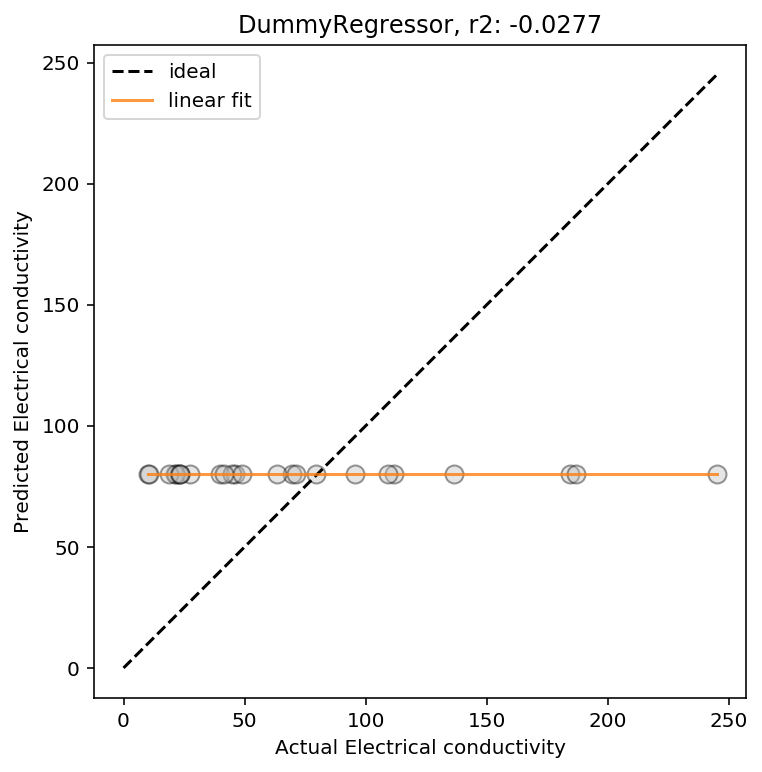

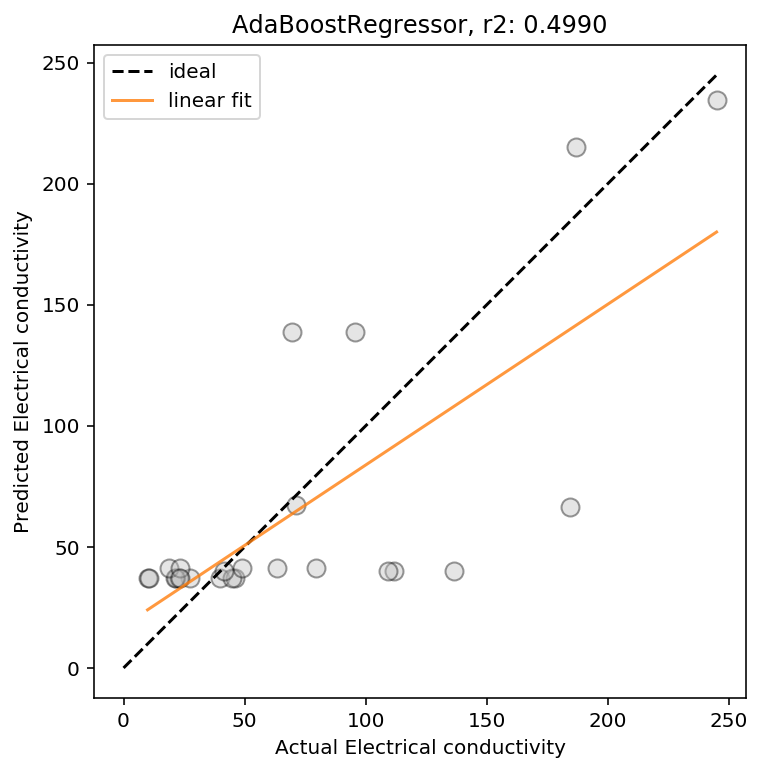

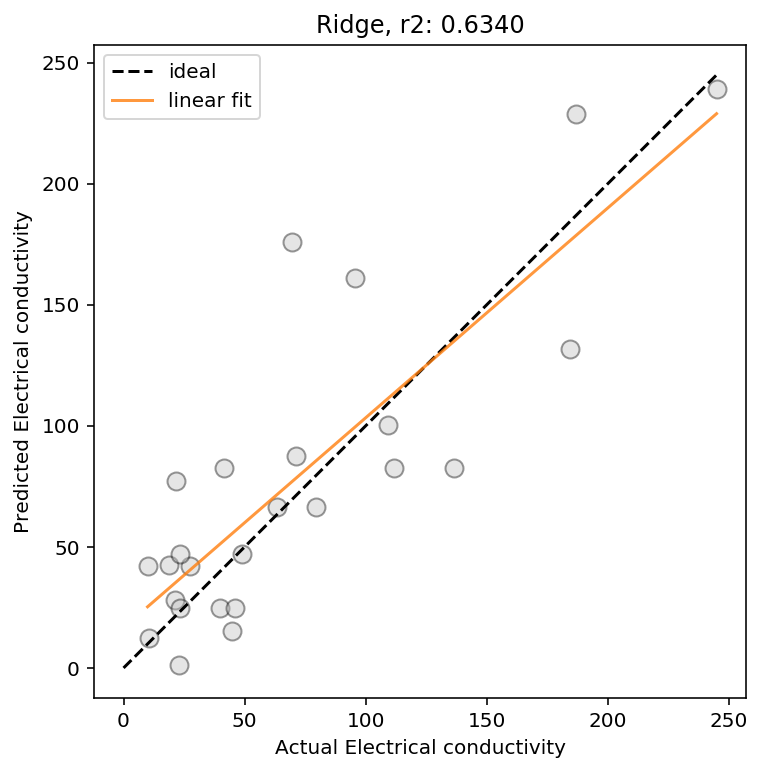

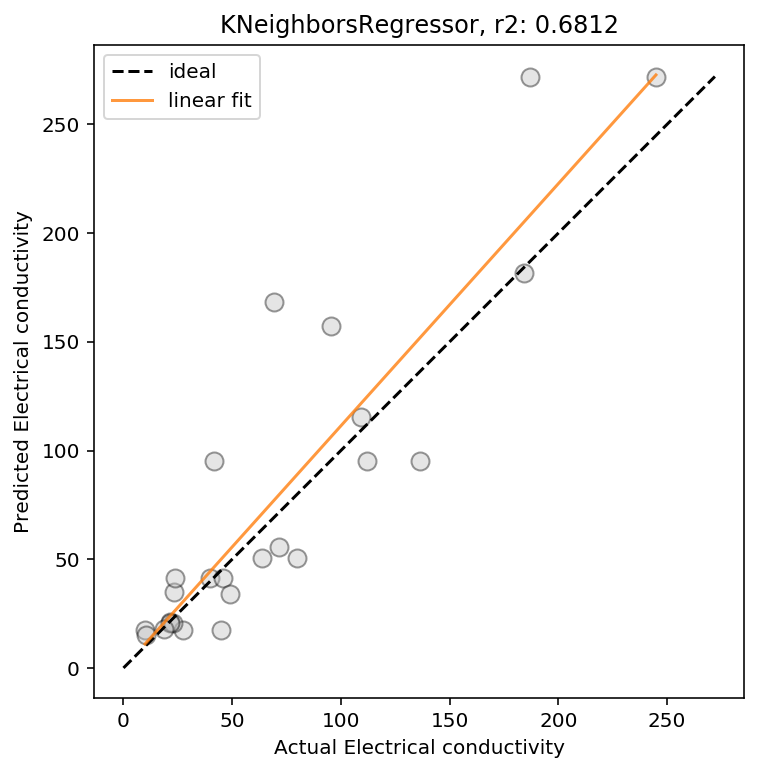

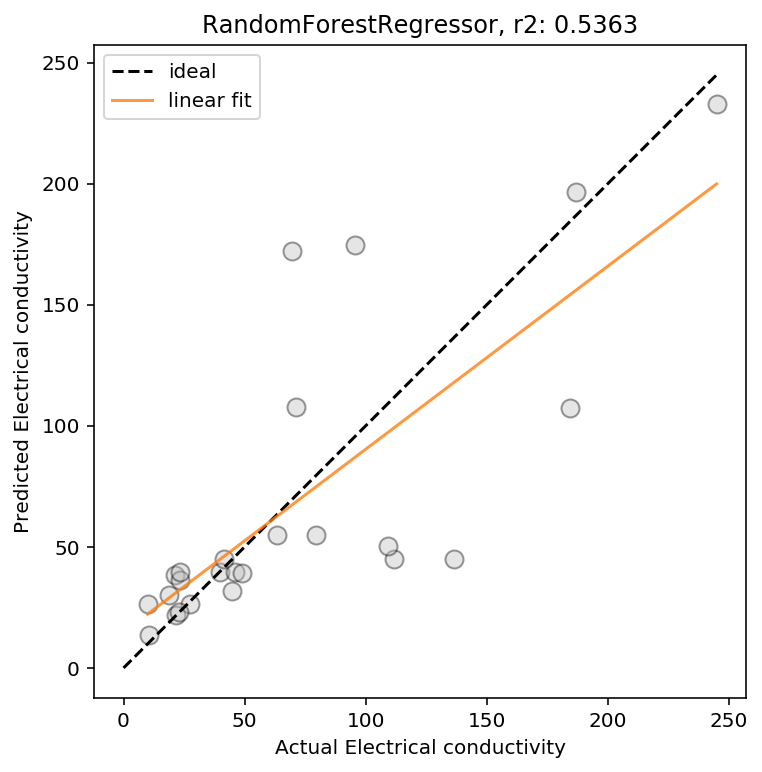

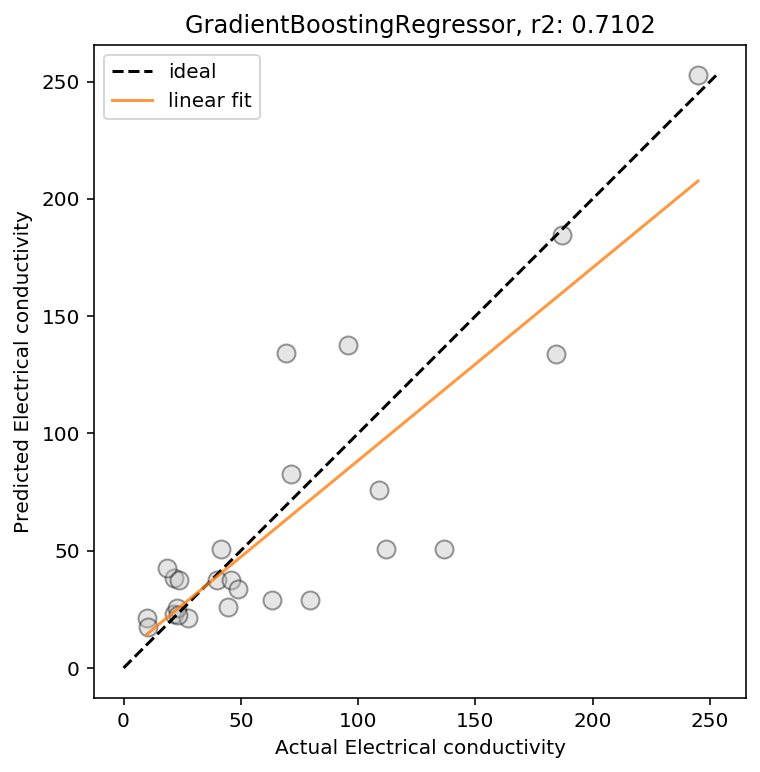

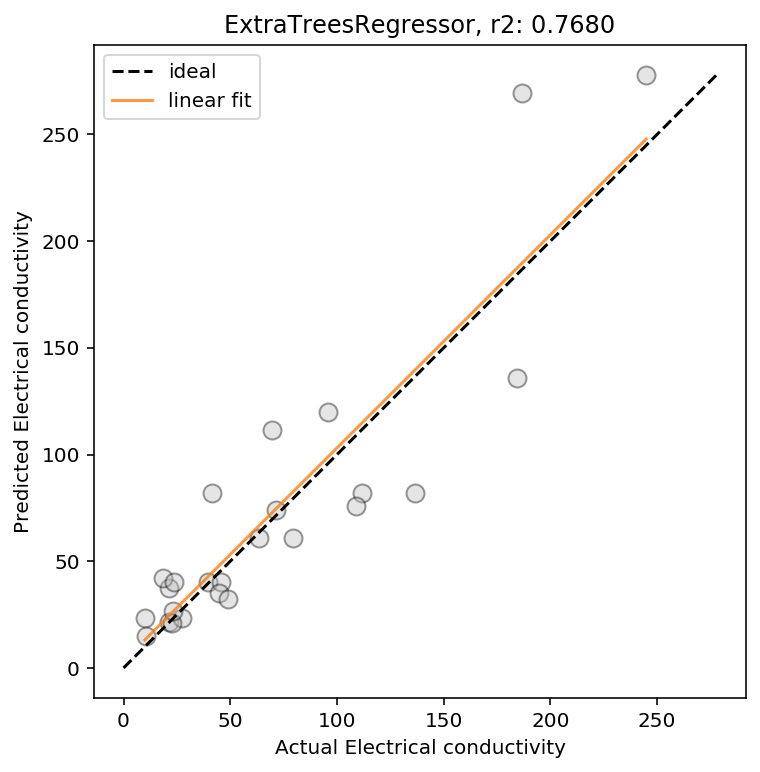

In [28]:
for row in range(df_classics.shape[0]):
    model_name = df_classics.iloc[row]['model_name']

    model = classic_models[model_name]
    y_act_test = y_test
    y_pred_test = model.predict(X_test)

    plot = plot_pred_act(y_act_test, y_pred_test, model, reg_line=True, label='Electrical conductivity')

In [29]:
from sklearn.neighbors import KNeighborsClassifier as Knn
from sklearn.model_selection import cross_val_score as crovasco
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [30]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)

In [31]:
from sklearn.ensemble import RandomForestClassifier as Rafo
from sklearn.ensemble import ExtraTreesRegressor as ExTr
np.random.seed(0)
rafo = ExTr(100)
rafo.fit(X_train_unscaled,y_train_encoded)
print(rafo.feature_importances_)

[4.11707988e-03 1.11880018e-02 3.89650288e-03 6.41726205e-03
 3.37886339e-03 3.57502736e-03 6.15683446e-03 9.34420230e-03
 1.99277549e-03 6.22617020e-03 3.32569814e-03 2.53126365e-02
 4.65225238e-03 7.09667801e-03 2.02690222e-03 1.44321781e-03
 5.06930810e-04 6.56644651e-03 6.74090409e-03 2.65124752e-03
 6.16846400e-04 8.09798043e-03 3.84487638e-03 1.18166869e-02
 5.18266916e-03 6.69526250e-03 3.94313831e-03 4.33612801e-03
 6.72853582e-03 6.87188280e-03 1.73598419e-03 5.66675536e-03
 3.54744665e-03 7.71607806e-03 1.14316525e-02 1.71938987e-03
 4.34240192e-03 1.20944843e-03 2.16520239e-03 7.58756042e-03
 6.41523742e-03 2.35891181e-03 3.04494816e-04 7.09893568e-03
 5.40303522e-04 2.26411196e-02 7.72866404e-04 3.04667607e-03
 4.28963302e-03 0.00000000e+00 2.04919289e-02 1.40498875e-02
 5.72208157e-04 1.06387136e-02 0.00000000e+00 1.74369922e-05
 5.59700051e-04 6.33883382e-04 1.49968686e-01 5.70763491e-04
 5.92398550e-04 2.56567514e-02 5.71098784e-03 6.26801171e-03
 1.47849984e-03 3.661767

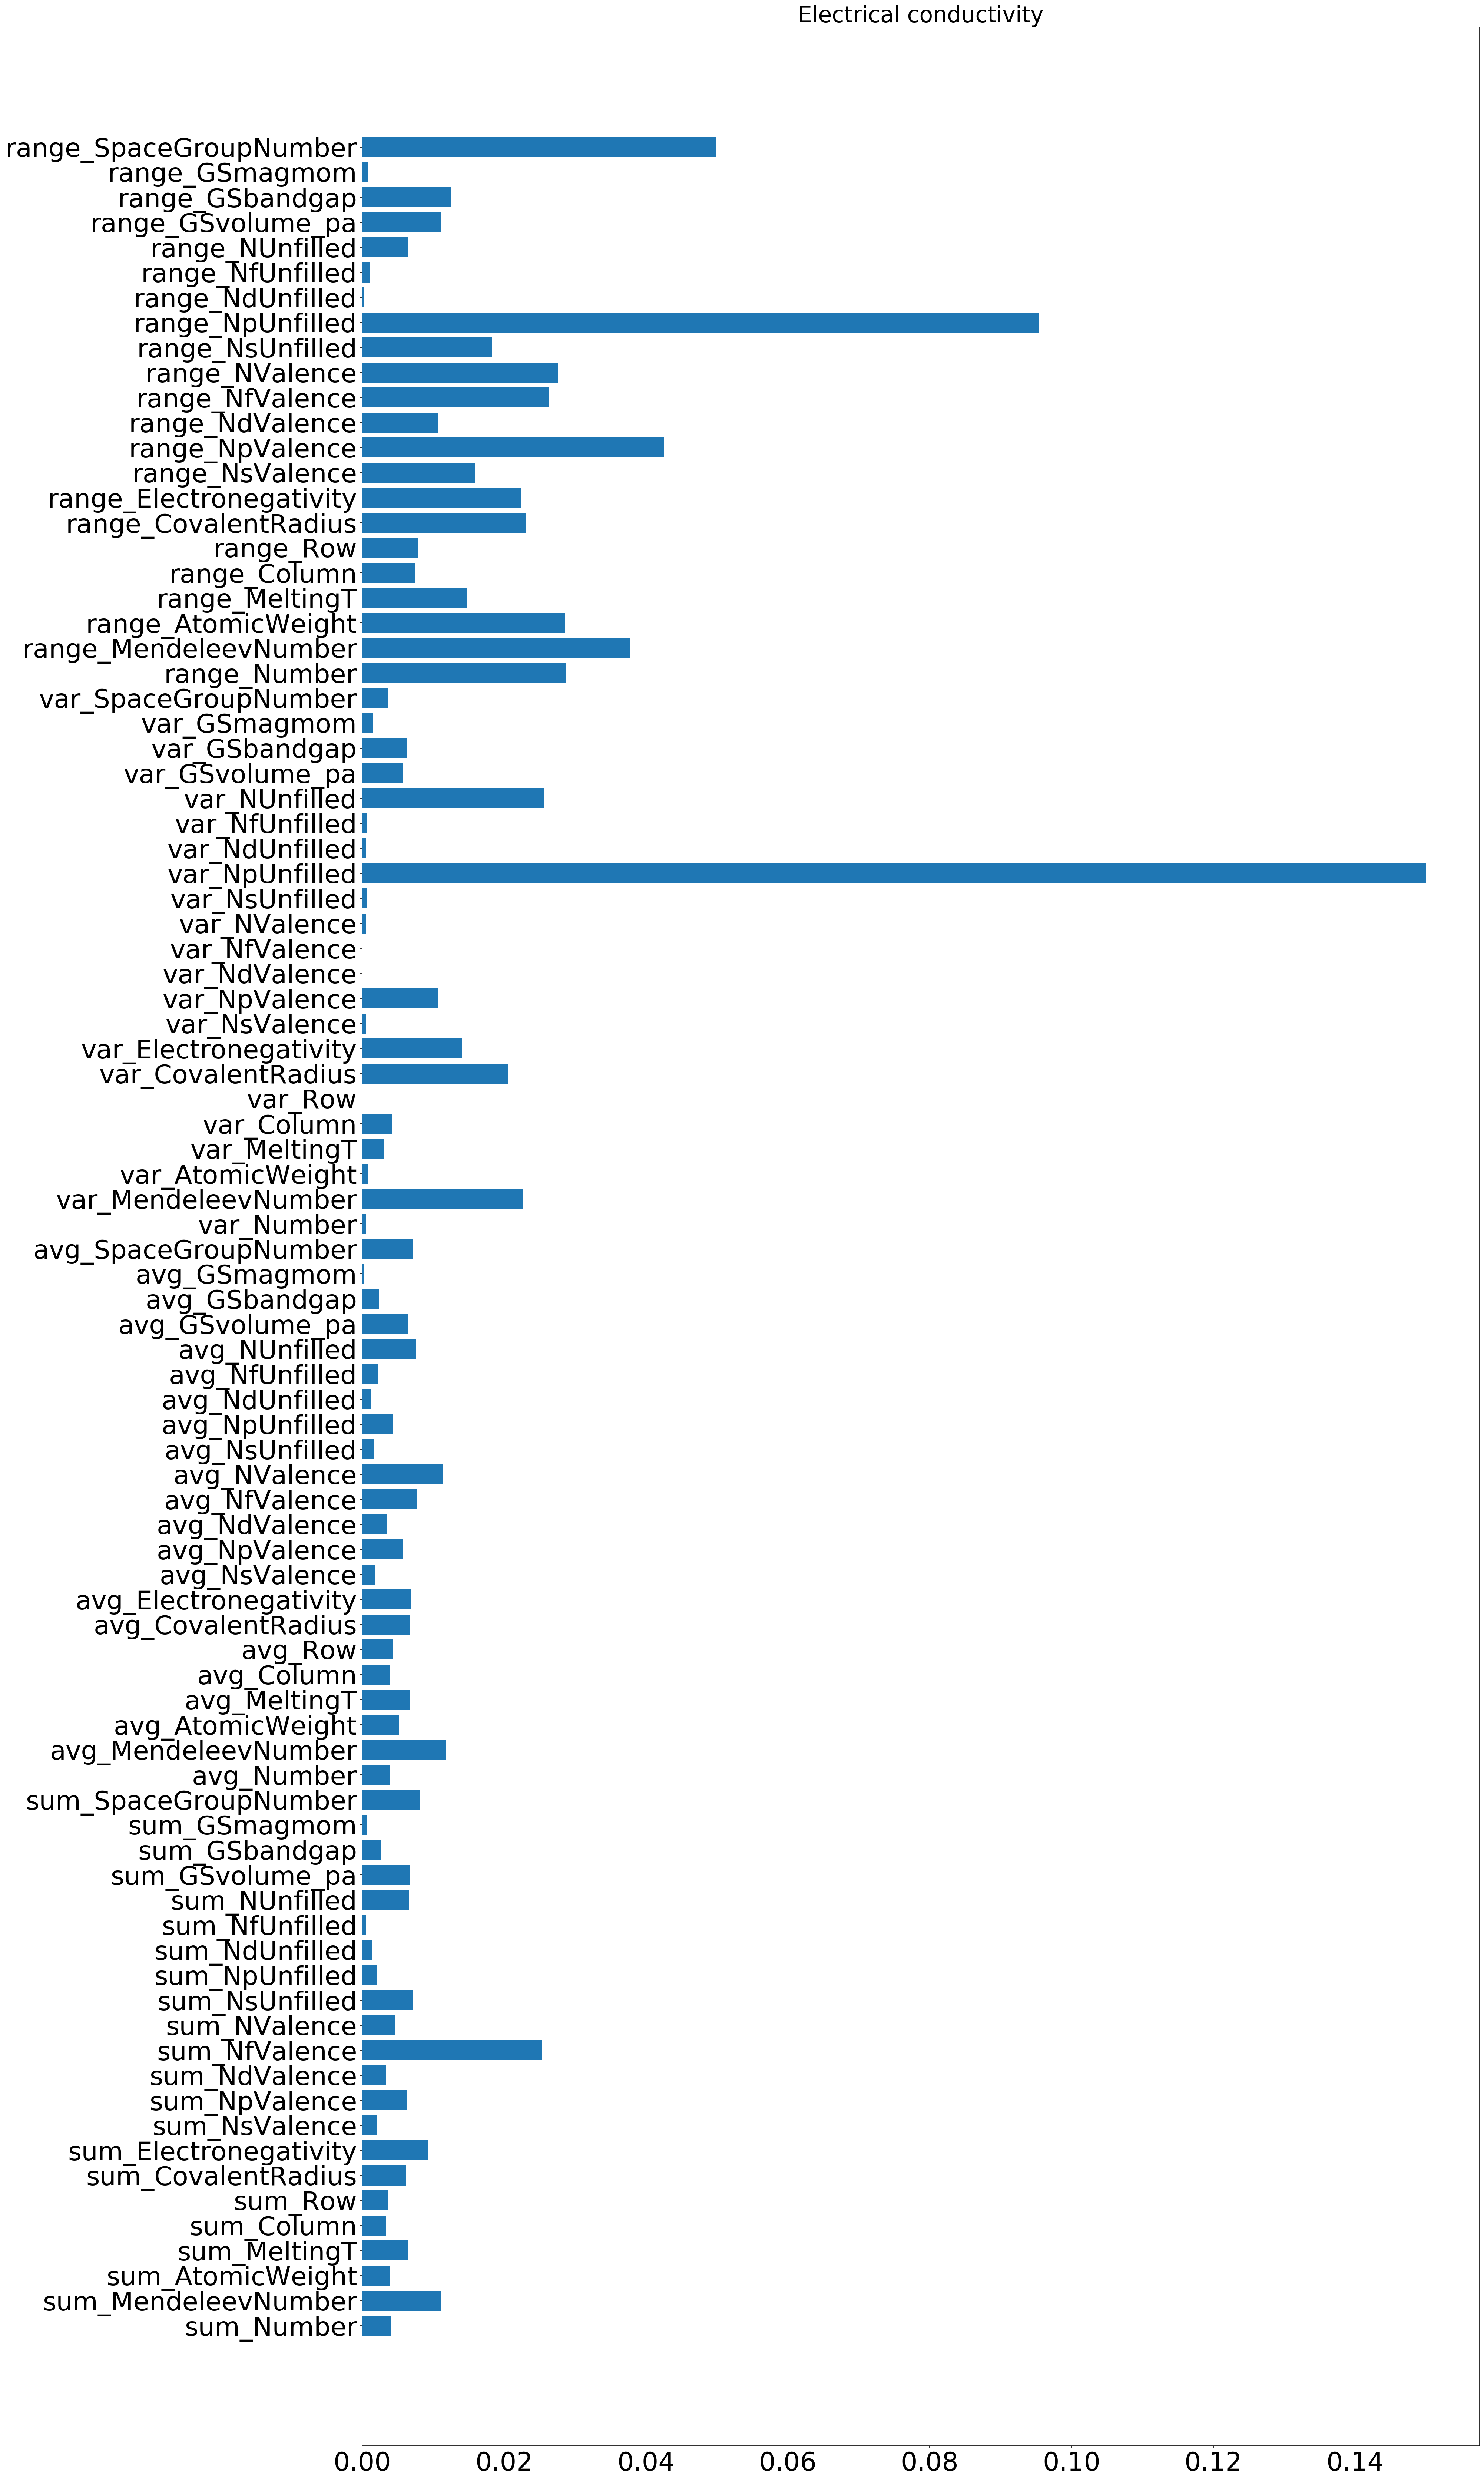

In [32]:
plt.figure(figsize=[27,60])
plt.axes()
plt.barh(np.arange(88),rafo.feature_importances_, )
plt.yticks(np.arange(88),X_train_unscaled.columns, fontsize=35 )
plt.xticks( fontsize=35 )
plt.title('Electrical conductivity',fontsize=30)
plt.show()